In [1]:
import pylab
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
def orient_corref(M, N, NP, L, n, binr, name):

    r = np.linspace(0.1111111111, L/2, binr)
    results = []
    
    for run in range(0,10):
        dist = {}
        for i in range(len(r)):
            dist[i] = []

        for i in range(M,N):
            data = pylab.loadtxt('./' + str(run) + '_' + name + '_' + str(round(L,2)) + '/traj_MC_' + name + '_' + str(round(L,2)) + '_' + str(i) + '.dat')
            x = data[:,0]
            y = data[:,1]
            theta = data[:,2]

            for j in range(0,NP):
                for k in range(j,NP):
                    dx = abs(x[j]-x[k])
                    dy = abs(y[j]-y[k])

                    #periodic boundary condition
                    if dx>L/2: dx = L-dx
                    if dy>L/2: dy = L-dy

                    d = (dx**2 + dy**2)**0.5

                    t1 = theta[j]
#                     if t1 >= np.pi:
#                         t1 = t1 - np.pi

                    t2 = theta[k]
#                     if t2 >= np.pi:
#                         t2 = t2 - np.pi

                    for l in range(0, len(r)-1):
                        if d > r[l] and d < r[l+1]:
                            dist[l+1].append(t1*t2)

        res = []

        for i in range(1,len(dist)):
            res.append(np.average(dist[i]))

        for i in range(len(res)):
            norm = 2*np.pi*((r[i+1]))*(r[1] - r[0])/(n*(N-M)*NP)
            res[i] = res[i]/norm
        
        results.append(res)
    
    std = np.std(results, axis=0)
    results = np.average(results, axis=0)
    r = np.array([(r[i]+r[i+1])/2 for i in range(len(r)-1)])
    return results, std, r

In [3]:
num_disk = 31
Area_frac = 0.20
D = 0.11111111111
phi = 4*Area_frac/(num_disk*np.pi*D*D)

M = 1
N = 100
NP = 64
L = (NP/phi)**0.5
n = NP/(L**2)
binr = 20

name = 'NORMAL'
results, std, r = orient_corref(M, N, NP, L, n, binr, name)
# plt.errorbar(r, results, yerr=std, ecolor='red', elinewidth=1, capsize=5, color='red', label='Explicit Distance Calculation')

name = 'ML_Grad_Boost'
results2, std2, r = orient_corref(M, N, NP, L, n, binr, name)
# plt.errorbar(r, results2, yerr=std2, ecolor='black', elinewidth=1, capsize=5, color='black', label='ML Model')

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


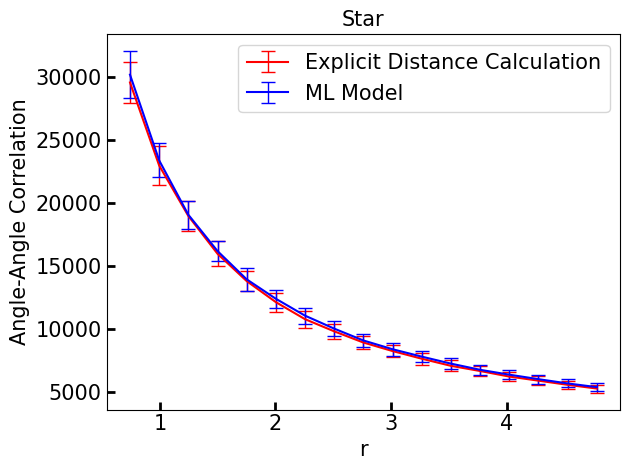

In [4]:
plt.errorbar(r, results, yerr=std, ecolor='red', elinewidth=1, capsize=5, color='red', label='Explicit Distance Calculation')
plt.errorbar(r, results2, yerr=std2, ecolor='blue', elinewidth=1, capsize=5, color='blue', label='ML Model')

plt.title('Star', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.xlabel("r",fontsize=15)
plt.ylabel("Angle-Angle Correlation",fontsize=15)
plt.tick_params(direction='in', length=6, width=2, colors='black', labelsize=15, grid_color='black')

plt.tight_layout()
plt.savefig('./star_0.2_orient_corref.png', dpi=200)
plt.show()